In [29]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string  
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.probability import FreqDist  
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
# Import required modules
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer




In [30]:

df = pd.read_csv("C:\\Users\\youse\\Desktop\\amazon_alexa.tsv", sep='\t')

df.head()


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [32]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [33]:
df.isnull().sum()


rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [34]:

nltk.download("stopwords")
nltk.download("punkt")

def preprocess_text(text):
    # Tokenization
    words = word_tokenize(text)
    # Lowercasing and punctuation removal
    words = [word.lower() for word in words if word.isalpha()]
    words = [word for word in words if word not in set(stopwords.words('english'))]
    return " ".join(words)  

    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\youse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\youse\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:

df['text'] = df['verified_reviews'].apply(preprocess_text)


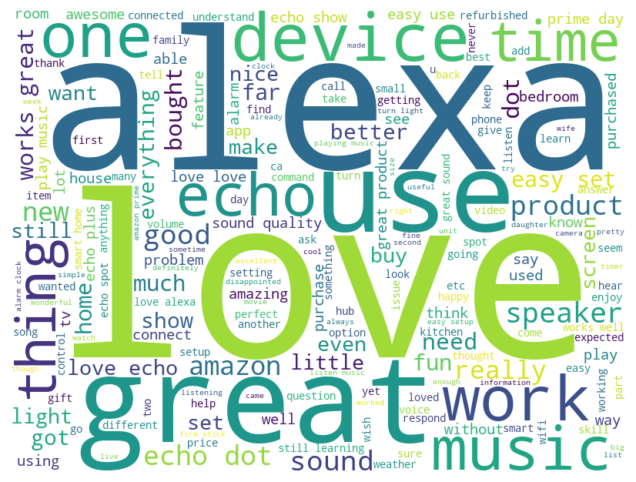

In [36]:
all_words = [word for text in df['text'] for word in text.split()]
word_freq = FreqDist(all_words)

wordcloud = WordCloud(
    width=800,
    height=600,
    background_color='white'
).generate(" ".join(all_words)) 
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [37]:
nltk.download("vader_lexicon")
sid = SentimentIntensityAnalyzer()

def get_sentiment(text):
    sentiment = sid.polarity_scores(text)
    if sentiment['compound'] >= 0.05:
        return 'positive'
    elif sentiment['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\youse\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [38]:
df['sentiment'] = df['text'].apply(get_sentiment)


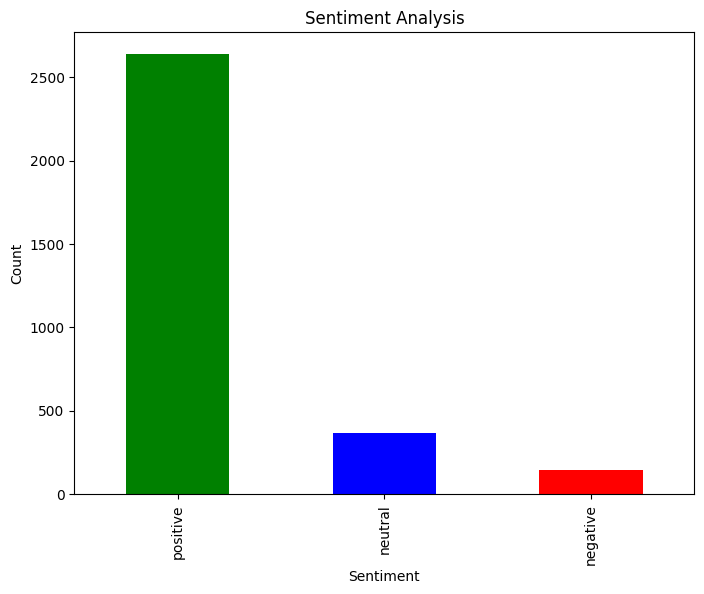

In [39]:
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [40]:
print(sentiment_counts)

positive    2640
neutral      364
negative     146
Name: sentiment, dtype: int64


In [41]:
df.head(5)

,rating,date,variation,verified_reviews,feedback,text,sentiment
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love echo,positive
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved,positive
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes playing game answer question correct...,positive
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing yr old learns dinosaurs control ...,positive
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,neutral


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
 5   text              3150 non-null   object
 6   sentiment         3150 non-null   object
dtypes: int64(2), object(5)
memory usage: 172.4+ KB


In [44]:
# Separate features and target variable
X_text = df['verified_reviews']  # Replace with your actual text column name
y = df['sentiment']  # Replace with your actual target column name

# Convert text data to numerical data
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X_text)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.25, random_state=42)

# Train the logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Evaluate the model
score = lr.score(X_test, y_test)

print(score)

0.9251269035532995
